## Data Cleanning

In [1]:
conda install -c conda-forge/label/gcc7 missingno

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

# All requested packages already installed.




In [2]:
import pandas as pd
import datetime
import numpy as np
import missingno as msno
from collections import Counter
from numpy import nansum
from numpy import nanmean

* Load all CSV files into DataFrames

In [3]:
daily_Data_df = pd.read_csv("data_as_csv.csv")
Daily_Rain_df = pd.read_csv("Daily Rain.csv")
Kineret_levels_df = pd.read_csv("Kineret_levels_Scrapping.csv")
Measurement_Stations_df = pd.read_csv("Measurement Stations.csv")

In [4]:
daily_Data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440100 entries, 0 to 1440099
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Unnamed: 0         1440100 non-null  int64  
 1   _id                1440100 non-null  int64  
 2   stn_num            1440100 non-null  int64  
 3   time_obs           1440100 non-null  object 
 4   tmp_air_max        1232097 non-null  float64
 5   tmp_air_min        1228192 non-null  float64
 6   tmp_grass_min      541650 non-null   float64
 7   evp_cls_a_12       27583 non-null    float64
 8   evp_cls_a_18       51121 non-null    float64
 9   evp_cls_a_06_next  451083 non-null   float64
 10  evp_cls_a_code     484161 non-null   float64
 11  sns_drt            112525 non-null   float64
 12  rpr_hail           271889 non-null   float64
 13  rpr_snow           326632 non-null   float64
 14  rpr_frost          279260 non-null   float64
 15  rpr_dew            110625 non-nu

<AxesSubplot:>

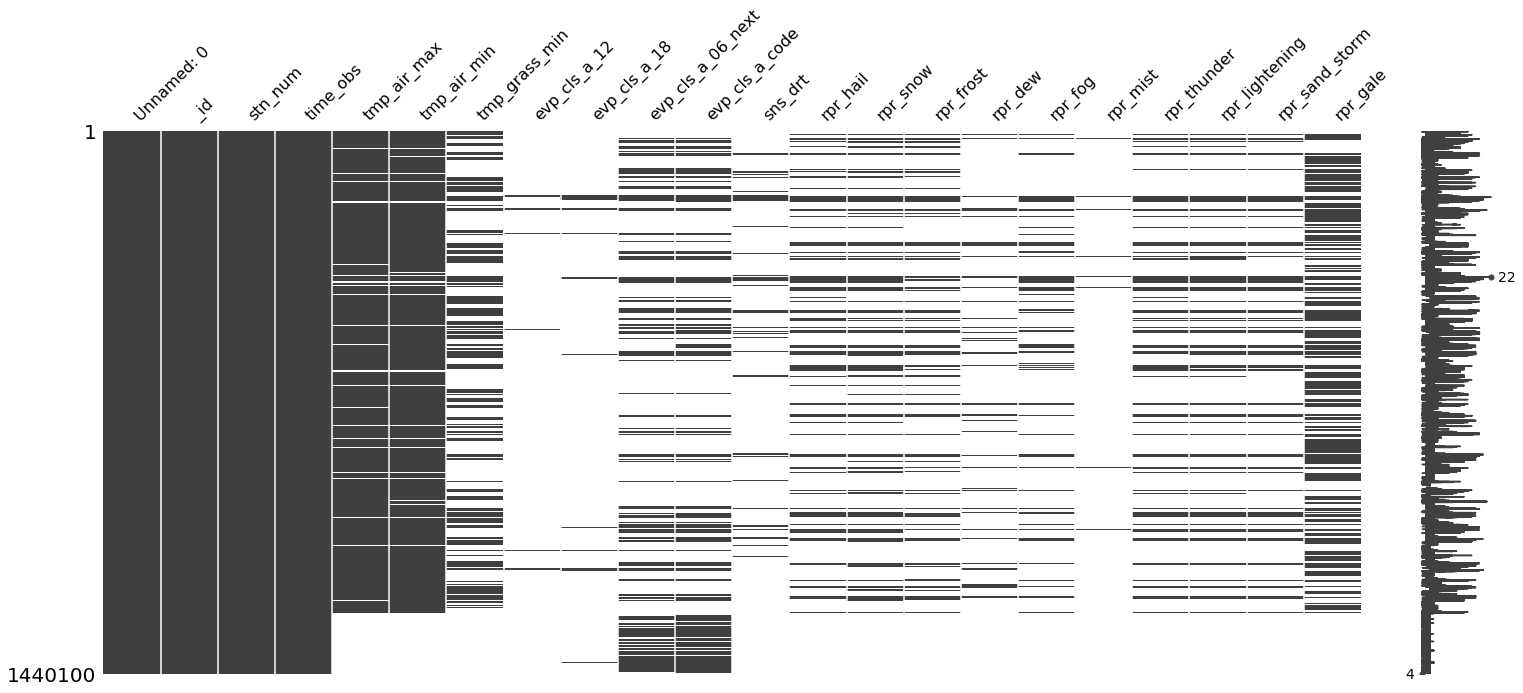

In [5]:
msno.matrix(daily_Data_df)

* drop non relevant columns

In [6]:
daily_Data_df= daily_Data_df.drop(['_id','rpr_mist','rpr_dew','evp_cls_a_code','rpr_lightening','rpr_sand_storm','evp_cls_a_06_next','rpr_frost','rpr_thunder','evp_cls_a_18','evp_cls_a_12','tmp_grass_min'],axis=1)

<AxesSubplot:>

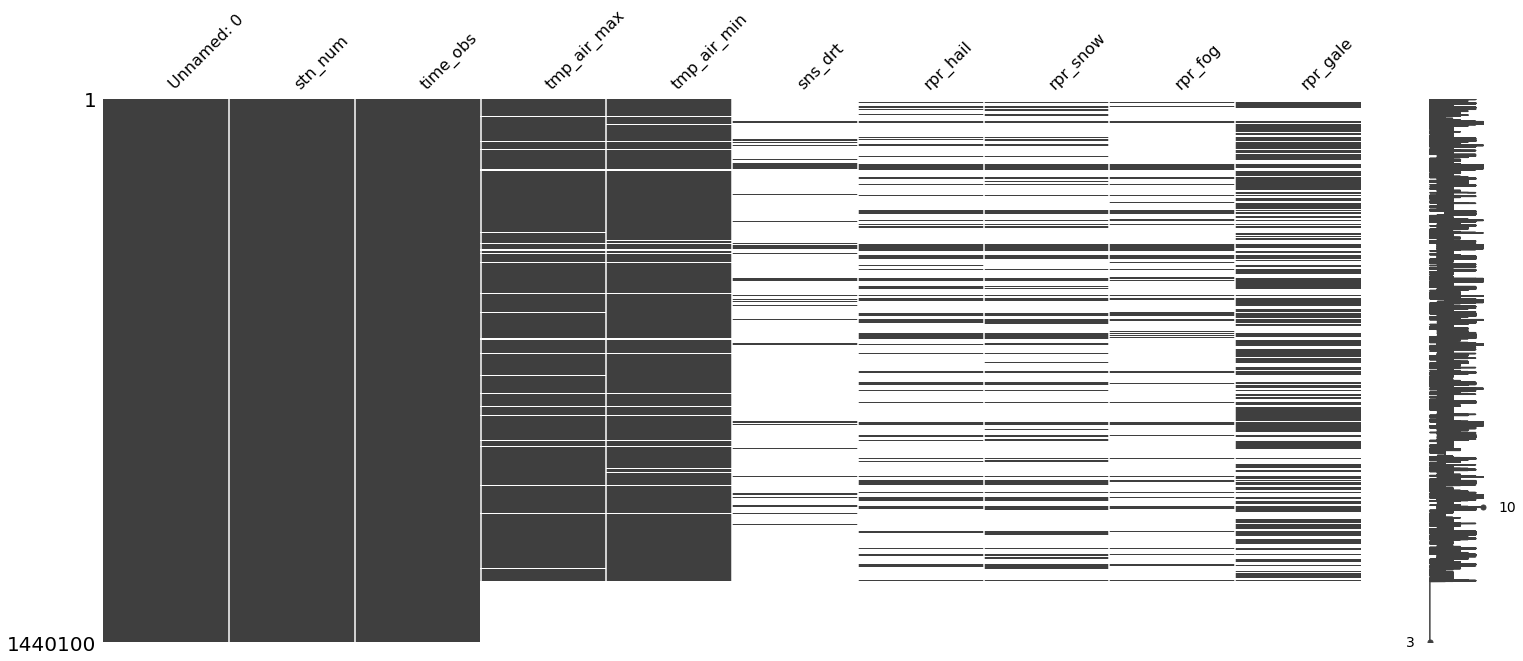

In [7]:
msno.matrix(daily_Data_df)

In [8]:
daily_Data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440100 entries, 0 to 1440099
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Unnamed: 0   1440100 non-null  int64  
 1   stn_num      1440100 non-null  int64  
 2   time_obs     1440100 non-null  object 
 3   tmp_air_max  1232097 non-null  float64
 4   tmp_air_min  1228192 non-null  float64
 5   sns_drt      112525 non-null   float64
 6   rpr_hail     271889 non-null   float64
 7   rpr_snow     326632 non-null   float64
 8   rpr_fog      192816 non-null   float64
 9   rpr_gale     731728 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 109.9+ MB


In [9]:
Daily_Rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694325 entries, 0 to 694324
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   stn_num       694325 non-null  int64  
 1   time_obs      694325 non-null  object 
 2   rain_06_next  689298 non-null  float64
 3   rain_code     694325 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 21.2+ MB


In [10]:
Measurement_Stations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   _id            2235 non-null   int64  
 1   stn_num        2235 non-null   int64  
 2   stn_type       2235 non-null   int64  
 3   stn_name       2235 non-null   object 
 4   stn_name_heb   2235 non-null   object 
 5   stn_long       2235 non-null   float64
 6   stn_lat        2235 non-null   float64
 7   isr_grid_X     2235 non-null   int64  
 8   isr_grid_Y     2235 non-null   int64  
 9   stn_hgt        2235 non-null   int64  
 10  date_open      2235 non-null   object 
 11  date_close     1623 non-null   object 
 12  stn_auto       2235 non-null   int64  
 13  stn_num_env    108 non-null    float64
 14  date_web_frst  2235 non-null   object 
 15  date_web_last  2235 non-null   object 
dtypes: float64(3), int64(7), object(6)
memory usage: 279.5+ KB


In [11]:
Kineret_levels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19114 entries, 0 to 19113
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survey_Date     19084 non-null  object 
 1   Kinneret_Level  19084 non-null  float64
dtypes: float64(1), object(1)
memory usage: 298.8+ KB


* Arrange a Kineret_Levels Dataframe for more reading and delete irrelevant columns  

In [12]:
Kineret_levels_df = Kineret_levels_df.rename({'Survey_Date': 'Date'}, axis='columns')
Kineret_levels_df['Date'] =pd.to_datetime(Kineret_levels_df['Date'])
Kineret_levels_df=Kineret_levels_df.sort_values(by=['Date'])
Kineret_levels_df = Kineret_levels_df.rename({'Survey_Date': 'Date'}, axis='columns')
Kineret_levels_df['Date'] =pd.to_datetime(Kineret_levels_df['Date'])
Kineret_levels_df=Kineret_levels_df.sort_values(by=['Date'])
Kineret_levels_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19114 entries, 0 to 19113
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            19084 non-null  datetime64[ns]
 1   Kinneret_Level  19084 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 448.0 KB


* Filtering measurement stations according to a certain latitude near the Sea of Galilee (north - stn_name: EN HAHORESH >=32.3865)

In [13]:
Measurement_Stations_df = Measurement_Stations_df[(Measurement_Stations_df['stn_lat']>=32.3865)]
Measurement_Stations_df = Measurement_Stations_df[['stn_num','stn_name','stn_lat']]
Measurement_Stations_df

,stn_num,stn_name,stn_lat
0,21,ROSH HANIQRA,33.0806
1,120,NAHARIYYA NORTH,33.0249
2,190,SHAVE ZIYYON,32.9836
3,282,AKKO,32.9318
4,282,AKKO,32.9318
...,...,...,...
2230,2496501,ALLONE HABASHAN,33.0432
2231,2496600,QESHET,32.9812
2232,2496700,KHOCHNIYE,33.0038
2233,2496900,NAHAL GESHUR - TEL FARES,32.9558


* Doing Merge between 2 dataframes (Daily_Rain & Measurement_Stations) and arrange them

In [14]:
Daily_Rain_df = pd.merge(Daily_Rain_df, Measurement_Stations_df, how='right')
Daily_Rain_df = Daily_Rain_df.rename({'time_obs': 'Date','rain_06_next':'rain_mm'}, axis='columns')
Daily_Rain_df= Daily_Rain_df.drop(['rain_code'],axis=1) # Drop rain_code colunm
Daily_Rain_df['Date'] =pd.to_datetime(Daily_Rain_df['Date'])
Daily_Rain_df=Daily_Rain_df.sort_values(by=['Date'])
Daily_Rain_df=Daily_Rain_df.groupby('Date').agg({'rain_mm':'mean'}).reset_index()
Daily_Rain_df

,Date,rain_mm
0,1969-01-04,55.450980
1,1969-01-05,311.750000
2,1969-01-06,437.100000
3,1969-01-07,296.708333
4,1969-01-08,64.457627
...,...,...
7839,2021-04-09,1.666667
7840,2021-04-10,50.070707
7841,2021-04-11,25.000000
7842,2021-04-12,1.000000


* Doing Merge between 2 dataframes (Daily_Data & Measurement_Stations) and arrange them

In [15]:
daily_Data_df['stations']=1
daily_Data_df = pd.merge(daily_Data_df, Measurement_Stations_df, how='right')
daily_Data_df['tmp_air_max']=daily_Data_df['tmp_air_max']/10
daily_Data_df['tmp_air_min']=daily_Data_df['tmp_air_min']/10
daily_Data_df = daily_Data_df.rename({'time_obs': 'Date'}, axis='columns')
daily_Data_df['Date'] =pd.to_datetime(daily_Data_df['Date'])
    
#Performing an aggregation operation + consolidation of duplicate data in a table
daily_Data_df=daily_Data_df.groupby('Date').agg({'tmp_air_max':'mean','tmp_air_min':'mean','sns_drt':'mean','rpr_hail':'mean',
                                     'rpr_snow':'mean','rpr_gale':'mean','stations':'count'}).reset_index()                
daily_Data_df=daily_Data_df.sort_values(by=['Date'])
daily_Data_df = daily_Data_df[daily_Data_df['Date'].dt.year >= 1969]
daily_Data_df

,Date,tmp_air_max,tmp_air_min,sns_drt,rpr_hail,rpr_snow,rpr_gale,stations
10958,1969-01-01,19.567742,7.251613,504.0,NaN,NaN,NaN,31
10959,1969-01-02,19.629032,8.848387,444.0,NaN,NaN,NaN,31
10960,1969-01-03,18.722581,11.364516,339.0,NaN,NaN,NaN,31
10961,1969-01-04,16.651613,11.061290,189.0,1.0,NaN,NaN,31
10962,1969-01-05,14.100000,8.145161,198.0,1.0,NaN,NaN,31
...,...,...,...,...,...,...,...,...
30036,2021-03-27,16.832432,6.829730,NaN,NaN,NaN,0.0,48
30037,2021-03-28,18.045946,5.905405,NaN,NaN,NaN,0.0,46
30038,2021-03-29,19.694595,6.186486,NaN,NaN,NaN,0.0,45
30039,2021-03-30,22.297297,8.456757,NaN,NaN,NaN,0.0,46


In [16]:
daily_Data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19083 entries, 10958 to 30040
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         19083 non-null  datetime64[ns]
 1   tmp_air_max  19083 non-null  float64       
 2   tmp_air_min  19083 non-null  float64       
 3   sns_drt      14519 non-null  float64       
 4   rpr_hail     15263 non-null  float64       
 5   rpr_snow     15363 non-null  float64       
 6   rpr_gale     16678 non-null  float64       
 7   stations     19083 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 1.3 MB


<AxesSubplot:>

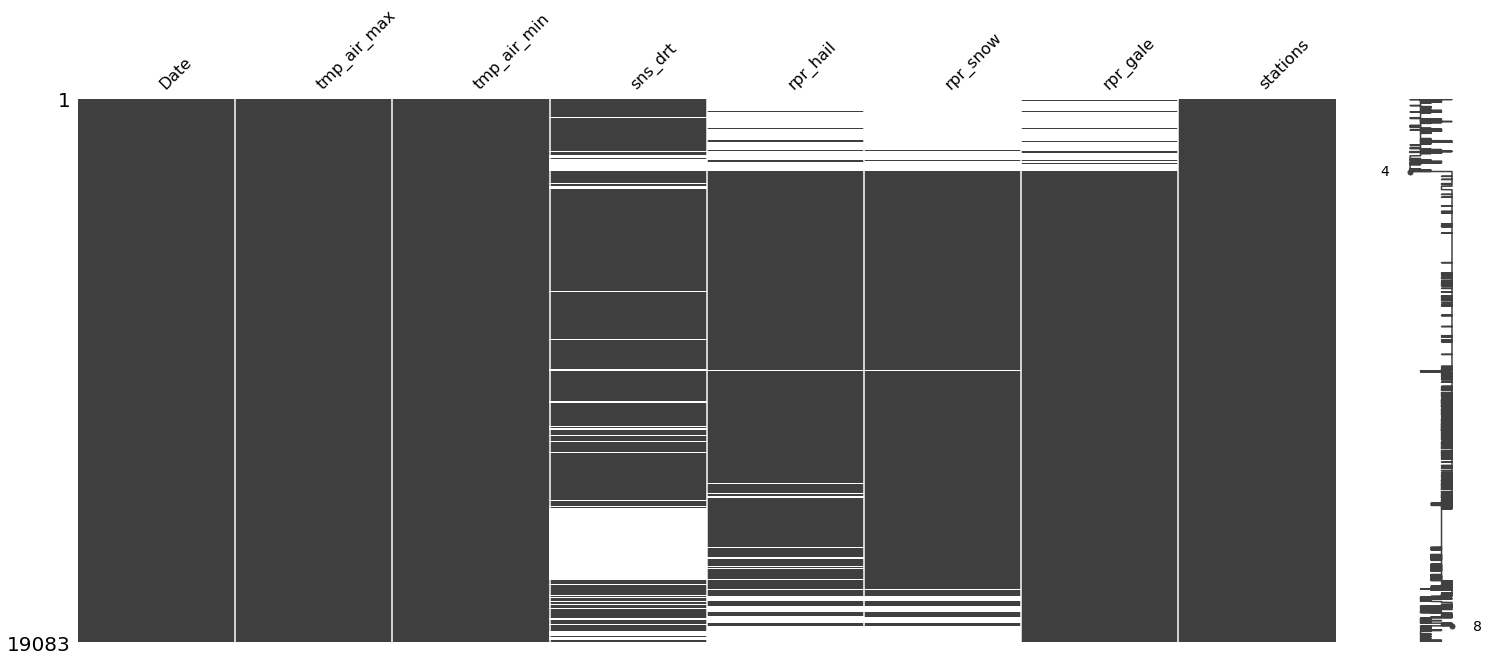

In [17]:
msno.matrix(daily_Data_df)

In [18]:
Measurement_Stations_df.head()

,stn_num,stn_name,stn_lat
0,21,ROSH HANIQRA,33.0806
1,120,NAHARIYYA NORTH,33.0249
2,190,SHAVE ZIYYON,32.9836
3,282,AKKO,32.9318
4,282,AKKO,32.9318


In [19]:
Kineret_levels_df.head()

,Date,Kinneret_Level
0,1969-01-01,-209.17
1,1969-01-02,-209.21
2,1969-01-03,-209.22
3,1969-01-04,-209.25
4,1969-01-05,-209.27


* Merge all dataframes to Dataframe called "all_Dataframes" 

In [20]:
all_Dataframes= daily_Data_df.copy()
all_Dataframes = pd.merge(all_Dataframes, Kineret_levels_df, how='left', on='Date')
all_Dataframes = pd.merge(all_Dataframes, Daily_Rain_df, how='left', on='Date')
all_Dataframes['Date'] =pd.to_datetime(all_Dataframes['Date'])

# Create additional columns by disassembling the "Dates" column that will be used by us in the following steps 
all_Dataframes['year'] = pd.DatetimeIndex(all_Dataframes['Date']).year
all_Dataframes['month'] = pd.DatetimeIndex(all_Dataframes['Date']).month
all_Dataframes['day'] = pd.DatetimeIndex(all_Dataframes['Date']).day
all_Dataframes=all_Dataframes.sort_values(by=['Date'])
all_Dataframes

,Date,tmp_air_max,tmp_air_min,sns_drt,rpr_hail,rpr_snow,rpr_gale,stations,Kinneret_Level,rain_mm,year,month,day
0,1969-01-01,19.567742,7.251613,504.0,NaN,NaN,NaN,31,-209.170,NaN,1969,1,1
1,1969-01-02,19.629032,8.848387,444.0,NaN,NaN,NaN,31,-209.210,NaN,1969,1,2
2,1969-01-03,18.722581,11.364516,339.0,NaN,NaN,NaN,31,-209.220,NaN,1969,1,3
3,1969-01-04,16.651613,11.061290,189.0,1.0,NaN,NaN,31,-209.250,55.45098,1969,1,4
4,1969-01-05,14.100000,8.145161,198.0,1.0,NaN,NaN,31,-209.270,311.75000,1969,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19078,2021-03-27,16.832432,6.829730,NaN,NaN,NaN,0.0,48,-209.180,0.00000,2021,3,27
19079,2021-03-28,18.045946,5.905405,NaN,NaN,NaN,0.0,46,-209.175,NaN,2021,3,28
19080,2021-03-29,19.694595,6.186486,NaN,NaN,NaN,0.0,45,-209.170,NaN,2021,3,29
19081,2021-03-30,22.297297,8.456757,NaN,NaN,NaN,0.0,46,-209.165,NaN,2021,3,30


In [21]:
all_Dataframes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19083 entries, 0 to 19082
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            19083 non-null  datetime64[ns]
 1   tmp_air_max     19083 non-null  float64       
 2   tmp_air_min     19083 non-null  float64       
 3   sns_drt         14519 non-null  float64       
 4   rpr_hail        15263 non-null  float64       
 5   rpr_snow        15363 non-null  float64       
 6   rpr_gale        16678 non-null  float64       
 7   stations        19083 non-null  int64         
 8   Kinneret_Level  19083 non-null  float64       
 9   rain_mm         7835 non-null   float64       
 10  year            19083 non-null  int64         
 11  month           19083 non-null  int64         
 12  day             19083 non-null  int64         
dtypes: datetime64[ns](1), float64(8), int64(4)
memory usage: 2.0 MB


* Replace all NaN elements with 0 value (There are missing values, because in those days there was no precipitation of the same type of column)

In [22]:
all_Dataframes['rain_mm']=all_Dataframes['rain_mm'].fillna(0)
all_Dataframes['rpr_hail']=all_Dataframes['rpr_hail'].fillna(0)
all_Dataframes['rpr_snow']=all_Dataframes['rpr_snow'].fillna(0)
all_Dataframes['rpr_gale']=all_Dataframes['rpr_gale'].fillna(0)

"""
Creating a new column whose function is to provide us with whether it rained that day, 
will be used in the future to plot the amount of rainy days for visualization purposes.

And creating new columns in the Dataframe that aim to show us the delta of precipitation between days

"""
all_Dataframes['rain_day']= (all_Dataframes['rain_mm']>0).astype(int)
all_Dataframes['rain_yesterday'] = all_Dataframes['rain_day'].shift()
all_Dataframes['rain_yesterday_mm'] = all_Dataframes['rain_mm'].shift()
all_Dataframes['Change_from_last_day']=all_Dataframes['Kinneret_Level']-all_Dataframes['Kinneret_Level'].shift()
all_Dataframes['KinneretInPrecent']= (all_Dataframes['Kinneret_Level']-all_Dataframes['Kinneret_Level'].min())/(all_Dataframes['Kinneret_Level'].max()-all_Dataframes['Kinneret_Level'].min())
all_Dataframes=all_Dataframes.dropna(subset=['sns_drt'])
all_Dataframes.to_csv('all_DataframesFile.csv', index=False)

<AxesSubplot:>

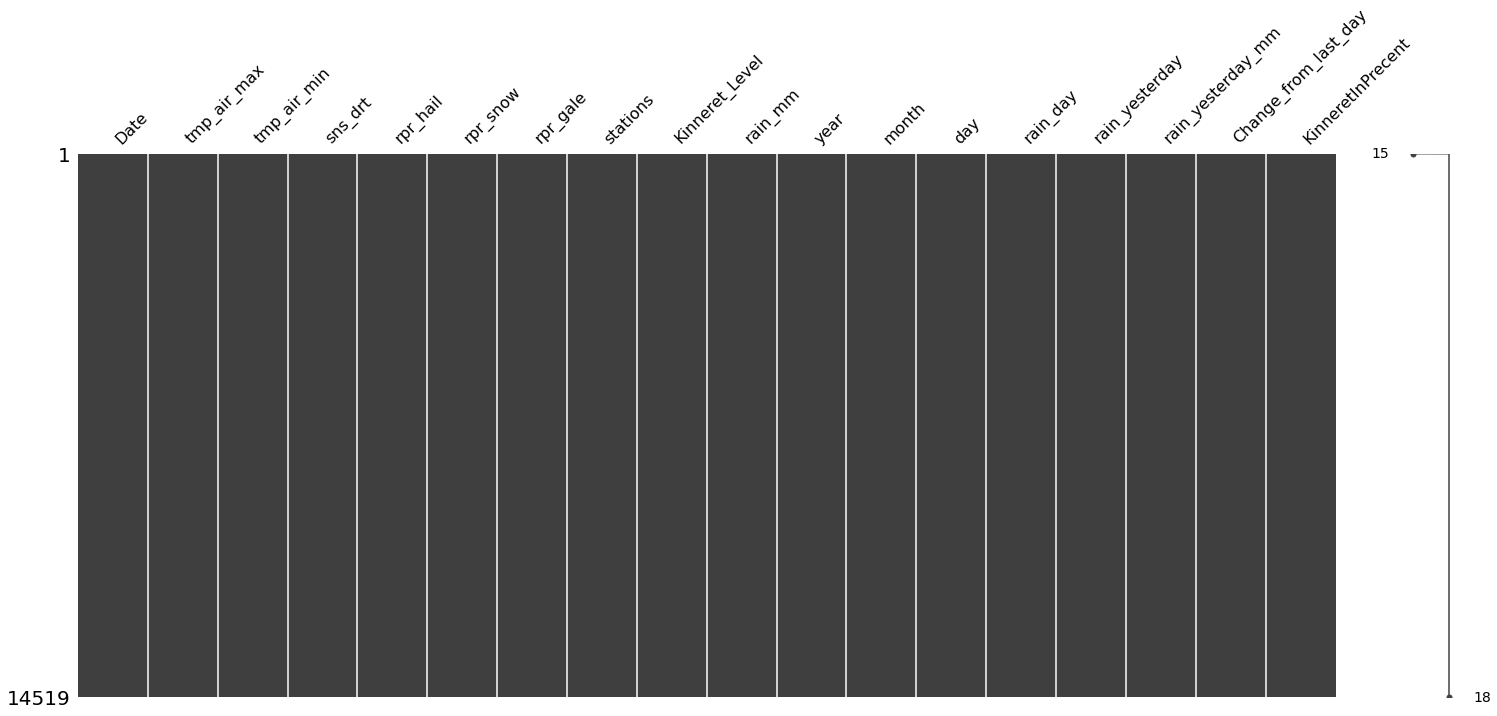

In [23]:
msno.matrix(all_Dataframes)

* Find Outliners values in the "all_Dataframes" Dataframe

In [24]:
# Outlier detection 

def detect_outliers(df, n, features):
    all_outliers_rows = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        IQR_Range = 1.5 * IQR
        col_outlier = df[(df[col] < Q1 - IQR_Range) | (df[col] > Q3 + IQR_Range)].index
        all_outliers_rows.extend(col_outlier)

    all_outliers_rows = Counter(all_outliers_rows)        
    multiple_outliers = list(k for k, v in all_outliers_rows.items() if v > n )
    return multiple_outliers   

Outliers_to_drop = detect_outliers(all_Dataframes, 3, all_Dataframes.columns[6:len(all_Dataframes.columns)-1])
print(len(Outliers_to_drop))

0


* Create a new Dataframe called "all_DataframesByYear" whose purpose is to present the data we worked on into annual data

In [25]:
all_DataframesByYear= all_Dataframes.copy()
# Replace Culomns names to relevalt name
all_DataframesByYear=all_DataframesByYear.rename({'Kinneret_Level': 'Kinneret_Level_end_of_year', 'KinneretInPrecent': 'KinneretInPrecent_end_of_year'}, axis=1)
all_DataframesByYear=all_DataframesByYear.groupby('year').agg({'rain_mm':'sum', 'Kinneret_Level_end_of_year':'last',
                                     #get the level in the end of the year
                                    'KinneretInPrecent_end_of_year':'last', 'sns_drt':'mean','rpr_hail':'mean','rpr_snow':'mean',
                                    'rpr_gale':'mean','rain_day':'sum','tmp_air_max':'mean','tmp_air_min':'mean'}).reset_index()

# Calculation of the difference in the level of the Sea of Galilee between the end of the current year and the end of the previous year
all_DataframesByYear['Change_from_last_year']=all_DataframesByYear['Kinneret_Level_end_of_year']-all_DataframesByYear['Kinneret_Level_end_of_year'].shift()
all_DataframesByYear.to_csv('all_DataframesFileByYear.csv', index=False)
all_DataframesByYear

,year,rain_mm,Kinneret_Level_end_of_year,KinneretInPrecent_end_of_year,sns_drt,rpr_hail,rpr_snow,rpr_gale,rain_day,tmp_air_max,tmp_air_min,Change_from_last_year
0,1969,8819.233230,-209.500,0.817352,501.438017,0.077135,0.011019,0.060606,128,25.494219,14.218484,NaN
1,1970,5828.420006,-210.490,0.666667,536.550898,0.068862,0.011976,0.020958,97,25.667770,13.742847,-0.990
2,1971,8734.777175,-209.900,0.756469,488.744868,0.079179,0.038123,0.038123,131,24.335717,13.007018,0.590
3,1972,5978.881051,-210.880,0.607306,497.901370,0.065753,0.027397,0.008219,131,24.928747,13.251005,-0.980
4,1973,5202.028594,-211.730,0.477930,541.084746,0.048023,0.014124,0.039548,107,25.262454,13.192467,-0.850
5,1974,6957.382467,-210.980,0.592085,451.075472,0.103774,0.056604,0.023585,81,22.945128,11.855567,0.750
6,1976,7480.823847,-210.990,0.590563,485.851648,0.013884,0.004556,0.003319,143,24.335141,13.463549,-0.010
7,1977,7183.155500,-210.280,0.698630,407.630332,0.020852,0.002185,0.005461,100,21.643863,10.798283,0.710
8,1978,6226.639046,-210.120,0.722983,532.330579,0.014021,0.000689,0.007933,123,25.039538,13.465029,0.160
9,1979,6319.067984,-211.390,0.529680,532.016667,0.006264,0.000358,0.006964,136,25.346659,14.277581,-1.270


* Create a new Dataframe called "all_DataframesByMonth" whose purpose is to present the data we worked on into Mountly data

In [29]:
all_DataframesByMonth= all_Dataframes.copy()
all_DataframesByMonth=all_DataframesByMonth.rename({'Kinneret_Level': 'Kinneret_Level_end_of_month'}, axis=1)
all_DataframesByMonth=all_DataframesByMonth.groupby(['year','month']).agg({'Kinneret_Level_end_of_month':'last',#get the level in the end of the month
                    'tmp_air_max':'mean','rain_mm':'sum', 'tmp_air_min':'mean','sns_drt':'mean','rain_day':'sum'}).reset_index()
                                               
all_DataframesByMonth['Date']= all_DataframesByMonth["year"].astype(str)+'-'+all_DataframesByMonth["month"].astype(str)
all_DataframesByMonth['Date'] =pd.to_datetime(all_DataframesByMonth['Date'])


#get the change in the level (Kinneret)
all_DataframesByMonth['Change_from_last_month']=all_DataframesByMonth['Kinneret_Level_end_of_month']-all_DataframesByMonth['Kinneret_Level_end_of_month'].shift()
all_DataframesByMonth.to_csv('all_DataframesFileByMonth.csv', index=False)
all_DataframesByMonth

,year,month,Kinneret_Level_end_of_month,tmp_air_max,rain_mm,tmp_air_min,sns_drt,rain_day,Date,Change_from_last_month
0,1969,1,-208.300,14.596258,4539.754913,8.010466,205.300000,24,1969-01-01,NaN
1,1969,2,-208.910,18.310669,334.159040,8.194848,401.571429,14,1969-02-01,-0.610
2,1969,3,-208.810,20.795559,1117.742258,10.826564,318.967742,18,1969-03-01,0.100
3,1969,4,-208.890,21.862056,295.571192,10.252892,527.600000,14,1969-04-01,-0.080
4,1969,5,-208.950,29.069598,45.059436,15.877323,588.967742,10,1969-05-01,-0.060
...,...,...,...,...,...,...,...,...,...,...
510,2020,8,-209.525,35.724710,0.000000,22.741313,645.714286,0,2020-08-01,-0.410
511,2020,9,-209.690,35.326290,0.500000,23.651229,596.818182,1,2020-09-01,-0.165
512,2020,11,-209.955,22.881180,1662.232398,13.726870,386.000000,10,2020-11-01,-0.265
513,2021,2,-209.300,19.065973,974.086319,8.636447,459.600000,8,2021-02-01,0.655


In [30]:
"""
#Mapping the temperature by range
bins=[0,5,10,15,20,25,30,35,40,45,50]
labels=['0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40-45','45-50']
bins = [all_DataframesByMonth['tmp_air_max'].quantile(0),all_DataframesByMonth['tmp_air_max'].quantile(0.2),all_DataframesByMonth['tmp_air_max'].quantile(0.4),all_DataframesByMonth['tmp_air_max'].quantile(0.6),all_DataframesByMonth['tmp_air_max'].quantile(0.8),all_DataframesByMonth['tmp_air_max'].quantile(1)]
labels = [str(int(all_DataframesByMonth['tmp_air_max'].quantile(0)))+'-'+str(int(all_DataframesByMonth['tmp_air_max'].quantile(0.2)))
          ,str(int(all_DataframesByMonth['tmp_air_max'].quantile(0.2)))+'-'+str(int(all_DataframesByMonth['tmp_air_max'].quantile(0.4)))
          ,str(int(all_DataframesByMonth['tmp_air_max'].quantile(0.4)))+'-'+str(int(all_DataframesByMonth['tmp_air_max'].quantile(0.6)))
          ,str(int(all_DataframesByMonth['tmp_air_max'].quantile(0.6)))+'-'+str(int(all_DataframesByMonth['tmp_air_max'].quantile(0.8)))
          ,str(int(all_DataframesByMonth['tmp_air_max'].quantile(0.8)))+'-'+str(int(all_DataframesByMonth['tmp_air_max'].quantile(1)))]
all_DataframesByMonth['tmp_air_max_binned']=pd.cut(all_DataframesByMonth['tmp_air_max'],bins,labels=labels)
#Mapping the temperature by range
bins = [all_DataframesByMonth['tmp_air_min'].quantile(0),all_DataframesByMonth['tmp_air_min'].quantile(0.2)
        ,all_DataframesByMonth['tmp_air_min'].quantile(0.4),all_DataframesByMonth['tmp_air_min'].quantile(0.6),
        all_DataframesByMonth['tmp_air_min'].quantile(0.8),all_DataframesByMonth['tmp_air_min'].quantile(1)]
labels = [str(int(all_DataframesByMonth['tmp_air_min'].quantile(0)))+'-'+str(int(all_DataframesByMonth['tmp_air_min'].quantile(0.2)))
          ,str(int(all_DataframesByMonth['tmp_air_min'].quantile(0.2)))+'-'+str(int(all_DataframesByMonth['tmp_air_min'].quantile(0.4)))
          ,str(int(all_DataframesByMonth['tmp_air_min'].quantile(0.4)))+'-'+str(int(all_DataframesByMonth['tmp_air_min'].quantile(0.6)))
          ,str(int(all_DataframesByMonth['tmp_air_min'].quantile(0.6)))+'-'+str(int(all_DataframesByMonth['tmp_air_min'].quantile(0.8)))
          ,str(int(all_DataframesByMonth['tmp_air_min'].quantile(0.8)))+'-'+str(int(all_DataframesByMonth['tmp_air_min'].quantile(1)))]
all_DataframesByMonth['tmp_air_min_binned']=pd.cut(all_DataframesByMonth['tmp_air_min'],bins,labels=labels)
all_DataframesByMonth.to_csv('all_DataframesFileByMonth.csv', index=False)
all_DataframesByMonth
"""

"\n#Mapping the temperature by range\nbins=[0,5,10,15,20,25,30,35,40,45,50]\nlabels=['0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40-45','45-50']\nbins = [all_DataframesByMonth['tmp_air_max'].quantile(0),all_DataframesByMonth['tmp_air_max'].quantile(0.2),all_DataframesByMonth['tmp_air_max'].quantile(0.4),all_DataframesByMonth['tmp_air_max'].quantile(0.6),all_DataframesByMonth['tmp_air_max'].quantile(0.8),all_DataframesByMonth['tmp_air_max'].quantile(1)]\nlabels = [str(int(all_DataframesByMonth['tmp_air_max'].quantile(0)))+'-'+str(int(all_DataframesByMonth['tmp_air_max'].quantile(0.2)))\n          ,str(int(all_DataframesByMonth['tmp_air_max'].quantile(0.2)))+'-'+str(int(all_DataframesByMonth['tmp_air_max'].quantile(0.4)))\n          ,str(int(all_DataframesByMonth['tmp_air_max'].quantile(0.4)))+'-'+str(int(all_DataframesByMonth['tmp_air_max'].quantile(0.6)))\n          ,str(int(all_DataframesByMonth['tmp_air_max'].quantile(0.6)))+'-'+str(int(all_DataframesByMonth['tmp_ai

In [31]:
all_DataframesByMonth.tail()

,year,month,Kinneret_Level_end_of_month,tmp_air_max,rain_mm,tmp_air_min,sns_drt,rain_day,Date,Change_from_last_month
510,2020,8,-209.525,35.724710,0.000000,22.741313,645.714286,0,2020-08-01,-0.410
511,2020,9,-209.690,35.326290,0.500000,23.651229,596.818182,1,2020-09-01,-0.165
512,2020,11,-209.955,22.881180,1662.232398,13.726870,386.000000,10,2020-11-01,-0.265
513,2021,2,-209.300,19.065973,974.086319,8.636447,459.600000,8,2021-02-01,0.655
514,2021,3,-209.195,20.509705,398.800363,10.040909,295.909091,12,2021-03-01,0.105


In [32]:
all_DataframesByMonth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   year                         515 non-null    int64         
 1   month                        515 non-null    int64         
 2   Kinneret_Level_end_of_month  515 non-null    float64       
 3   tmp_air_max                  515 non-null    float64       
 4   rain_mm                      515 non-null    float64       
 5   tmp_air_min                  515 non-null    float64       
 6   sns_drt                      515 non-null    float64       
 7   rain_day                     515 non-null    int32         
 8   Date                         515 non-null    datetime64[ns]
 9   Change_from_last_month       514 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int32(1), int64(2)
memory usage: 38.3 KB


In [33]:
all_DataframesByMonth=all_DataframesByMonth.dropna(subset=['Change_from_last_month'])
all_DataframesByMonth.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 514 entries, 1 to 514
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   year                         514 non-null    int64         
 1   month                        514 non-null    int64         
 2   Kinneret_Level_end_of_month  514 non-null    float64       
 3   tmp_air_max                  514 non-null    float64       
 4   rain_mm                      514 non-null    float64       
 5   tmp_air_min                  514 non-null    float64       
 6   sns_drt                      514 non-null    float64       
 7   rain_day                     514 non-null    int32         
 8   Date                         514 non-null    datetime64[ns]
 9   Change_from_last_month       514 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int32(1), int64(2)
memory usage: 42.2 KB


In [34]:
all_DataframesByMonth.to_csv('all_DataframesFileByMonth.csv', index=False)